# Python notebook to reproduce _Figure 2_

In [12]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import plot_settings
import plot_utils

In [13]:
fig_dir = 'figure_2/'

In [14]:
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [15]:
species = ['Chicken', 'Human', 'Mouse', 'Opossum', 'Rabbit', 'Rat', 'RhesusMacaque']
organs = ['Brain', 'Cerebellum', 'Heart', 'Kidney', 'Liver', 'Ovary', 'Testis']

In [16]:
def get_performance_by_species(spec, row):
    perfs = []
    n = 0
    for org in organs:
        keyname = '<{}, {}>'.format(spec, org)
        if keyname not in row:
            warnings.warn('No entry for ({}, {})'.format(spec, org))
            continue
        perfs.append(row[keyname])
        n += 1
    return np.mean(perfs), np.std(perfs) / np.sqrt(n)

In [17]:
def get_performance_by_organ(org, row):
    perfs = []
    n = 0
    for spec in species:
        keyname = '<{}, {}>'.format(spec, org)
        if keyname not in row:
            warnings.warn('No entry for ({}, {})'.format(spec, org))
            continue
        perfs.append(row[keyname])
        n += 1
    return np.mean(perfs), np.std(perfs) / np.sqrt(n)

In [18]:
def plot_EvoDevo_extrapolation_model_performances(metric, by_species=True):
    means = []
    stderrs = []
    df = pd.read_csv('results/EvoDevo/EvoDevo_model_performance:{}.csv'.format(metric))

    ax = plot_settings.get_wider_axis()
    model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS])
    colors = [plot_settings.get_model_colors(mod) for mod in model_ordering]
    labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]
    
    if by_species:
        for spec in species:
            task_vals = []
            for model in model_ordering:
                row = df[df['model'] == model].iloc[0]
                spec_perf = get_performance_by_species(spec, row)
                task_vals.append(spec_perf)
            means.append([v[0] for v in task_vals])
            stderrs.append([v[1] for v in task_vals])
    else: # divide by organ
        for org in organs:
            task_vals = []
            for model in model_ordering:
                row = df[df['model'] == model].iloc[0]
                org_perf = get_performance_by_organ(org, row)
                task_vals.append(org_perf)
            means.append([v[0] for v in task_vals])
            stderrs.append([v[1] for v in task_vals])

    plot_utils.grouped_barplot(
        ax, means, 
        [plot_settings.get_species_axis_tick(s) for s in species] if by_species else organs,
        xlabel='', ylabel=plot_settings.get_metric_name(metric), color_legend=labels,
        nested_color=colors, nested_errs=stderrs, tickloc_top=False, rotangle=45, anchorpoint='right',
        legend_loc='upper left' if metric == 'RMSE' else 'upper right',
        min_val=0.0 if 'time' not in metric else -0.2)
    
    plot_utils.format_ax(ax)
    plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper right', 
                            ncols=2)
    plot_utils.put_legend_outside_plot(ax, anchorage=(1.01, 1.01))

# Produce Fig. 2a-f

Fig. 2a

/tmp/ipykernel_530758/2309358727.py:7: UserWarning: No entry for (RhesusMacaque, Ovary)
  warnings.warn('No entry for ({}, {})'.format(spec, org))


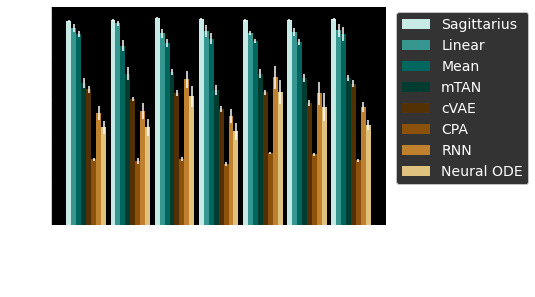

In [19]:
%matplotlib inline

plot_EvoDevo_extrapolation_model_performances('pearson_compare_genes')
plt.savefig(fig_dir + 'figure_2a.pdf')

Fig. 2b

/tmp/ipykernel_530758/2309358727.py:7: UserWarning: No entry for (RhesusMacaque, Ovary)
  warnings.warn('No entry for ({}, {})'.format(spec, org))


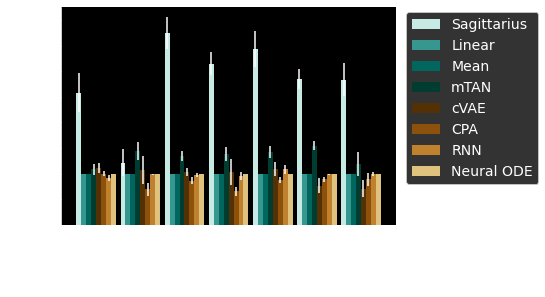

In [20]:
plot_EvoDevo_extrapolation_model_performances('pearson_compare_times')
plt.savefig(fig_dir + 'figure_2b.pdf')

Fig. 2c

/tmp/ipykernel_530758/2309358727.py:7: UserWarning: No entry for (RhesusMacaque, Ovary)
  warnings.warn('No entry for ({}, {})'.format(spec, org))


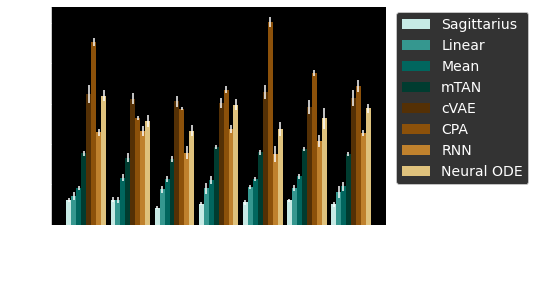

In [21]:
plot_EvoDevo_extrapolation_model_performances('RMSE')
plt.savefig(fig_dir + 'figure_2c.pdf')

Fig. 2d

/tmp/ipykernel_530758/3063809813.py:7: UserWarning: No entry for (RhesusMacaque, Ovary)
  warnings.warn('No entry for ({}, {})'.format(spec, org))


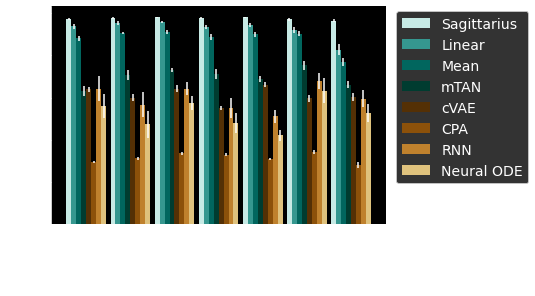

In [22]:
plot_EvoDevo_extrapolation_model_performances('pearson_compare_genes', by_species=False)
plt.savefig(fig_dir + 'figure_2d.pdf')

Fig. 2e

/tmp/ipykernel_530758/3063809813.py:7: UserWarning: No entry for (RhesusMacaque, Ovary)
  warnings.warn('No entry for ({}, {})'.format(spec, org))


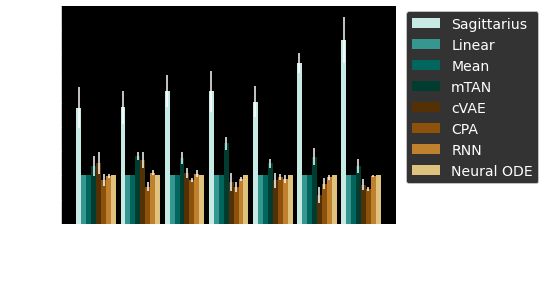

In [23]:
plot_EvoDevo_extrapolation_model_performances('pearson_compare_times', by_species=False)
plt.savefig(fig_dir + 'figure_2e.pdf')

Fig. 2f

/tmp/ipykernel_530758/3063809813.py:7: UserWarning: No entry for (RhesusMacaque, Ovary)
  warnings.warn('No entry for ({}, {})'.format(spec, org))


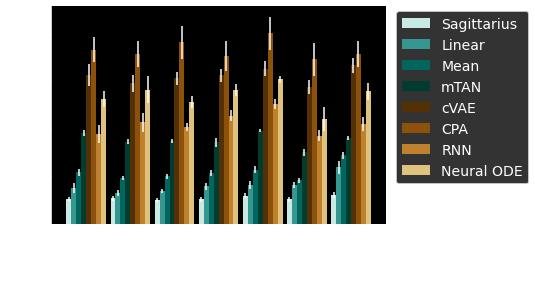

In [24]:
plot_EvoDevo_extrapolation_model_performances('RMSE', by_species=False)
plt.savefig(fig_dir + 'figure_2f.pdf')